<a href="https://colab.research.google.com/github/jrslagle/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/LS_DS_112_Make_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 2*

---

# Make Features 

- Student should be able to understand the purpose of feature engineering
- Student should be able to work with strings in pandas
- Student should be able to work with dates and times in pandas
- Student should be able to modify or create columns of a dataframe using the `.apply()` function


Helpful Links:
- [Minimally Sufficient Pandas](https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428)
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series
- [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)

# [Objective](#feature-engineering) - The Purpose of Feature Engineering



## Overview

Feature Engineering is the process of using a combination of domain knowledge, creativity and the pre-existing columns of a dataset to create completely new columns.

 Machine Learning models try to detect patterns in the data and then associate those patterns with certain predictions. The hope is that by creating new columns on our dataset that we can expose our model to new patterns in the data so that it can make better and better predictions.

This is largely a matter of understanding how to work with individual columns of a dataframe with Pandas --which is what we'll be practicing today!

## Follow Along

Columns of a dataframe each hold a specific type of data. Let's inspect some of the common datatypes found in datasets and then we'll make a new feature on a dataset using pre-existing columns.

In [ ]:
import pandas as pd

In [ ]:
# Lets take a look at the Ames Iowa Housing Dataset:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

In [ ]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

### Specific Columns hold specific kinds of data

In [ ]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Some columns hold integer values like the `BedroomAbvGr` which stands for "Bedrooms Above Grade." This is the number of non-basement bedrooms in the home.

For more information on specific column meanings view the [data dictionary](https://github.com/ryanleeallred/datasets/blob/master/Ames%20Housing%20Data/data_description.txt).

In [ ]:
# Look at the first ten rows of the `BedroomAbvGr` column.
# Looks like integers to me!
print('First 10 values:')
print(df['BedroomAbvGr'][:10])
print('Unique values =',df['BedroomAbvGr'].nunique())
print('Type =',df['BedroomAbvGr'].dtypes)
print('Value counts:')
df['BedroomAbvGr'].value_counts(dropna=False)

First 10 values:
0    3
1    3
2    3
3    3
4    4
5    1
6    3
7    3
8    2
9    2
Name: BedroomAbvGr, dtype: int64
Unique values = 8
Type = int64
Value counts:


3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

Some columns hold float values like the `LotFrontage` column.

In [ ]:
# Look at the first ten rows of the `LotFrontage` column.
print('First 10 values:')
print(df['LotFrontage'][:10])

First 10 values:
0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
8    51.0
9    50.0
Name: LotFrontage, dtype: float64


Hmmm, do the values above look like floats to you?

They all have .0 on them so technically they're being stored as floats, but *should* they be stored as floats?

Lets see what all of the possible values for this column are.

In [ ]:
print('There are',df['LotFrontage'].nunique(),'unique values.')
df['LotFrontage'].value_counts(dropna=False)

There are 110 unique values.


NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

Looks to me like the `LotFrontage` column originally held integer values but was cast to a `float` meaning that each original integer values was converted to its corresponding float representation. 

Any guesses as to why that would have happened?


HINT: What's the most common `LotFrontage` value for this column?

In [ ]:
# NaN is the most common value in this column. What is a NaN
import numpy as np
print('NaN is type',type(np.NaN))
plus_one = np.NaN + 1
print('Adding 1 to NaN gives you',plus_one,'of type',type(plus_one))

NaN is type <class 'float'>
Adding 1 to NaN gives you nan of type <class 'float'>


`NaN` stands stands for "Not a Number" and is the default missing value indicator with Pandas. This means there were cells in this column that didn't have a LotFrontage value recorded for those homes. 

This is where domain knowledge starts to come in. Think about the context we're working with here: houses. What might a null or blank cell representing "Linear feet of street connected to property" mean in the context of a housing dataset?

Ok, so maybe it makes seanse to have some NaNs in this column. What is the datatype of a NaN value?

Perhaps some of this data is truly missing or unrecorded data, but sometimes `NaNs` are more likely to indicate something that was "NA" or "Not Applicable" to a particular observation. There could be multiple reasons why there was no value recorded for a particular feature.

Remember, that Pandas tries to maintain a single datatype for all values in a column, and therefore...

In [ ]:
# What is the datatype of NaN?
print('NaN is type',type(np.NaN))
print('And cast to a string is capitalized as \''+str(np.NaN)+'\'')

NaN is type <class 'float'>
And cast to a string is capitalized as 'nan'


The datatype of a NaN is float!  This means that if we have a column of integer values, but the column has even a single `NaN` that column will not be treated with the integer datatype but all of the integers will be converted to floats in order to try and preserve the same datatype throughout the entire column.

You can see already how understanding column datatypes is crucial to understanding how Pandas help us manage our data.

### Making new Features

Lets slim down the dataset and consider just a few specific columns:

- `TotalBsmtSF`
- `1stFlrSF`
- `2ndFlrSF`
- `SalePrice`


In [ ]:
# I can make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets
slim_df = df[['TotalBsmtSF','1stFlrSF','2ndFlrSF','SalePrice']]
print('Shape =',slim_df.shape)
print(slim_df.dtypes)
slim_df.head()

Shape = (1460, 4)
TotalBsmtSF    int64
1stFlrSF       int64
2ndFlrSF       int64
SalePrice      int64
dtype: object


,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
0,856,856,854,208500
1,1262,1262,0,181500
2,920,920,866,223500
3,756,961,756,140000
4,1145,1145,1053,250000


### Syntax for creating new columns

When making a new column on a dataframe, we have to use the square bracket syntax of accessing a column. We can't use "dot syntax" here.

In [ ]:
# Lets add up all of the square footage to get a single square footage 
# column for the entire dataset

# Using bracket syntax to make a new 'TotalSquareFootage' column
slim_df['TotalSquareFootage'] = slim_df.loc[:,'TotalBsmtSF'] + slim_df.loc[:,'1stFlrSF'] + slim_df.loc[:,'2ndFlrSF']
slim_df.head()
# I tried to get rid of the 'SettingWithCopyWarning', but no luck.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [ ]:
# Lets make a nother new column that is 'PricePerSqFt' by
# dividing the price by the square footage
slim_df['PricePerSqFt'] = slim_df['SalePrice'] / slim_df['TotalSquareFootage']
slim_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage,PricePerSqFt
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235
3,756,961,756,140000,2473,56.611403
4,1145,1145,1053,250000,3343,74.783129


Ok, we have made two new columns on our small dataset.

- What does a **high** `PricePerSqFt` say about a home that the square footage and price alone don't capture as directly?

  - `A high price per square footage indicates a nicer home which uses better materials like marble and appliances like a combo washer/dryer or even a pool outside (which isn't in the square footage).`

- What does a **low** `PricePerSqFt` say about a home that the square footage and price alone don't directly capture?

  - `Conversely a low price per square footage indicates the house doesn't use expensive materials / appliances / infrastructure. It probably uses the cheapest architecture that is still up to code.`


## Challenge

I hope you can see how we have used existing columns to create a new column on a dataset that say something new about our unit of observation. This is what making new features (columns) on a dataset is all about and why it's so essential to data science --particularly predictive modeling "Machine Learning." 

We'll spend the rest of the lecture and assignment today trying to get as good as we can at manipulating (cleaning) and creating new columns on datasets.

# [Objective](#work-with-strings) Work with Strings with Pandas

## Overview

So far we have worked with numeric datatypes (ints and floats) but we haven't worked with any columns containing string values. We can't simply use arithmetic to manipulate string values, so we'll need to learn some more techniques in order to work with this datatype.

## Follow Along

We're going to import a new dataset here to work with. This dataset is from LendingClub and holds information about loans issued in Q4 of 2018. This dataset is a bit messy so it will give us plenty of opportunities to clean up existing columns as well as create new ones.

The `!wget` shell command being used here does exactly the same thing that your browser does when you type a URL in the address. It makes a request or "gets" the file at that address. However, in our case the file isn't a webpage, it's a compressed CSV file. 

Try copying and pasting the URL from below into your browser, did it start an automatic download? Any URLs like this that start automatic downloads when navigated to can be used along with the `!wget` command to bring files directly into your notebook's memory.

### Load a new dataset

In [ ]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-09-06 16:31:27--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 54.244.115.45, 54.148.13.215, 35.161.89.82
Connecting to resources.lendingclub.com (resources.lendingclub.com)|54.244.115.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [            <=>     ]  22.28M  2.25MB/s    in 10s     

2020-09-06 16:31:37 (2.23 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23360898]



We need to use the `!unzip` command to extract the csv from the zipped folder.

In [ ]:
!unzip /content/LoanStats_2018Q4.csv.zip

Archive:  /content/LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


We can also use bash/shell commands to look at the raw file using the `!head` and `!tail` commands

In [ ]:
!head /content/LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [ ]:
!tail /content/LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","2449.86","2449.86","4174.07","4174.07","3150.14","1023.93","0.0","0.0","0.0","Aug-2020","190.21","Sep-2020","Aug-2020","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.

As we look at the raw file itself, do you see anything that might cause us trouble as we read in the CSV file to a dataframe?

In [ ]:
# Read in the CSV
loan_data = pd.read_csv('/content/LoanStats_2018Q4.csv')
loan_data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title       emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose     title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       27975     27975       27975            36 months  14.47%  962.52      C     C2        Conductor       10+ years  MORTGAGE       180000     Not Verified        Dec-2018 Fully Paid  n          NaN NaN  credit_card Credit card refinancing 117xx    NY         11.47 0           Jul-1995         0              39                     NaN                    10       0       29711     66.8%      19        w                   0.00      0.00          31804.5298492634 31804.53        27975.00        3829.53       0.0                0.0        0.0                     Jan-2020     20288.02        NaN          Mar-2020           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            206072      0           1           0           1           17                 15676        63      0           1           10861      65       44500            1      4           2            2                    20607       7416           74.9    0                        0           17                 281                  20                    17             5        20                   39                       1                     39                             0                     5              7               5           6         1         8             13            7                   10       0                0            0                  0                  78.9           60               0             

The extra rows at the top and bottom of the file have done two things:

1) The top row has made it so that the entire dataset is being interpreted as column headers

2) The bottom two rows have been read into the 'id' column and are causing every column to have at least two `NaN` values in it.

In [ ]:
# We can fix the header problem by using the 'skiprows' parameter
loan_data = pd.read_csv('/content/LoanStats_2018Q4.csv', skiprows=1)
loan_data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,27975.0,27975.0,27975.0,36 months,14.47%,962.52,C,C2,Conductor,10+ years,MORTGAGE,180000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,11.47,0.0,Jul-1995,0.0,39.0,NaN,10.0,0.0,29711.0,66.8%,19.0,w,0.00,0.00,31804.529849,31804.53,...,60.0,0.0,0.0,286525.0,45387.0,29500.0,25025.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10000.0,10000.0,10000.0,60 months,12.98%,227.43,B,B5,Printer,9 years,RENT,60000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,660xx,KS,14.90,0.0,May-2007,0.0,NaN,112.0,7.0,1.0,10677.0,54.2%,12.0,w,7352.95,7352.95,4487.310000,4487.31,...,33.3,1.0,0.0,36200.0,27595.0,13000.0,16500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,28000.0,28000.0,28000.0,60 months,13.56%,645.15,C,C1,Project Manager,10+ years,MORTGAGE,128500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,760xx,TX,27.35,1.0,Jul-1987,0.0,24.0,NaN,16.0,0.0,55206.0,75%,31.0,w,20667.91,20667.91,12871.360000,12871.36,...,100.0,0.0,0.0,542027.0,128345.0,55000.0,60331.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,16000.0,16000.0,16000.0,60 months,13.56%,368.66,C,C1,LMSW,10+ years,RENT,46000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,787xx,TX,11.09,1.0,Oct-1997,1.0,11.0,NaN,9.0,0.0,18946.0,32.1%,21.0,w,11503.84,11503.84,7570.880000,7570.88,...,20.0,0.0,0.0,138125.0,128218.0,57600.0,79125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,7500.0,7500.0,7500.0,36 months,10.72%,244.55,B,B2,Program Manager,2 years,RENT,84000.0,Not Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,600xx,IL,3.86,0.0,May-2005,1.0,NaN,114.0,9.0,1.0,2200.0,12.6%,17.0,w,0.00,0.00,2829.930000,2829.93,...,0.0,1.0,0.0,403892.0,20833.0,17400.0,16812.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


Lets look at the NaN values of each column so that you can see the problem that the extra rows at the bottom of the file are creating for us

In [ ]:
# Sum null values by column and sort from least to greatest
loan_data.isnull().sum().sort_values(ascending=True)

inq_fi                           2
mo_sin_old_rev_tl_op             2
delinq_amnt                      2
chargeoff_within_12_mths         2
acc_open_past_24mths             2
                             ...  
settlement_percentage       127477
id                          128412
desc                        128414
url                         128414
member_id                   128414
Length: 144, dtype: int64

In [ ]:
# Address the extra NaNs in each column by skipping the footer as well.
import pandas as pd
loan_data = pd.read_csv('/content/LoanStats_2018Q4.csv', skiprows=1, skipfooter=2)
loan_data.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,4427.45,4427.45,7620.38,7620.38,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,2187.38,2187.38,3732.49,3732.49,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,4285.08,4177.96,7193.60,7013.76,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,4495.59,4495.59,7824.37,7824.37,...,0.0,0,0,73669,59194,4000,67369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print('Shape =',loan_data.shape)

Shape = (128412, 144)


In [ ]:
loan_data.isnull().sum().sort_values(ascending=True)

inq_fi                           0
mo_sin_old_rev_tl_op             0
delinq_amnt                      0
chargeoff_within_12_mths         0
acc_open_past_24mths             0
                             ...  
settlement_percentage       127475
desc                        128412
url                         128412
member_id                   128412
id                          128412
Length: 144, dtype: int64

For good measure, we'll also drop some columns that are made up completely of NaN values.

Why might LendingClub have included columns in their dataset that are 100% blank?

- My guess is their .export() method applies a mask to their dataframe for what data is public vs private. Private values are exported as NaN.

In [ ]:
loan_data.drop(['desc','url','member_id','id'], axis=1, inplace=True)
print('Shape =',loan_data.shape)
loan_data.isnull().sum().sort_values(ascending=True)

Shape = (128412, 140)


loan_amnt                         0
mo_sin_rcnt_rev_tl_op             0
mo_sin_old_rev_tl_op              0
delinq_amnt                       0
chargeoff_within_12_mths          0
                              ...  
debt_settlement_flag_date    127475
settlement_status            127475
settlement_date              127475
settlement_amount            127475
settlement_term              127475
Length: 140, dtype: int64

### Clean up the `int_rate` column

When we're preparing a dataset for a machine learning model we typically want to represent don't want to leave any string values in our dataset --because it's hard to do math on words. 

Specifically, we have a column that is representing a numeric value, but currently doesn't have a numeric datatype. Lets look at the first 10 values of the `int_rate` column

In [ ]:
# Look at the first 10 values of the int_rate column
loan_data['int_rate'][:10]

0     14.47%
1     12.98%
2     13.56%
3     13.56%
4     10.72%
5     20.89%
6     26.31%
7     23.40%
8     19.92%
9     17.97%
Name: int_rate, dtype: object

In [ ]:
# Look at a specific value from the int_rate column
loan_data['int_rate'][1234]

'  7.02%'

Problems that we need to address with this column:

- String column that should be numeric
- Percent Sign `%` included with the number
- Leading space at the beginning of the string

However, we're not going to try and write exactly the right code to fix this column in one go. We're going to methodically build up to the code that will help us address these problems.


In [ ]:
# Lets start with just fixing a single string.
# If we can fix one, we can usually fix all of them
an_interest_rate = loan_data['int_rate'][1234]
print("'"+str(an_interest_rate)+"' is a",type(an_interest_rate))

'  7.02%' is a <class 'str'>


In [ ]:
an_interest_rate = an_interest_rate.strip('%')
print("'"+str(an_interest_rate)+"' is a",type(an_interest_rate))

'  7.02' is a <class 'str'>


In [ ]:
# "Cast" the string value to a float
an_interest_rate = float(an_interest_rate)
print("'"+str(an_interest_rate)+"' is a",type(an_interest_rate))

'7.02' is a <class 'float'>


In [ ]:
def int_rate_to_float(string):
  return float(string.strip('%')) /100

an_interest_rate = loan_data['int_rate'][1234]
an_interest_rate = int_rate_to_float(an_interest_rate)
print("'"+str(an_interest_rate)+"' is a",type(an_interest_rate))

'0.0702' is a <class 'float'>


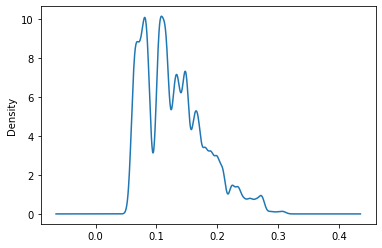

In [ ]:
loan_data['int_rate'].plot.density();

### Write a function to make our solution reusable!

In [ ]:
# Write a function that can do what we have written above to any 
# string that is passsed to it.
def int_rate_to_float(rate):
  return float(rate.strip('%')) /100

In [ ]:
# Test out our function by calling it on our example
# is the data type correct?

an_interest_rate = loan_data['int_rate'][1234]
an_interest_rate = int_rate_to_float(an_interest_rate)
print("'"+str(an_interest_rate)+"' is a",type(an_interest_rate))

'0.0702' is a <class 'float'>


### Apply our solution to every cell in a column

In [ ]:
loan_data['int_rate'][:10]

0     14.47%
1     12.98%
2     13.56%
3     13.56%
4     10.72%
5     20.89%
6     26.31%
7     23.40%
8     19.92%
9     17.97%
Name: int_rate, dtype: object

In [ ]:
loan_data['int_rate'] = loan_data['int_rate'].apply(int_rate_to_float)

In [ ]:
# What type of data is held in our new column?
loan_data['int_rate'][:10]
# Look at the datatypes of the last 5 columns

0    0.1447
1    0.1298
2    0.1356
3    0.1356
4    0.1072
5    0.2089
6    0.2631
7    0.2340
8    0.1992
9    0.1797
Name: int_rate, dtype: float64

In [ ]:
# are there any null values in this column?
loan_data['int_rate'].isnull().sum()

0

## Challenge

We can create a new column with our cleaned values or overwrite the original, whatever we think best suits our needs. On your assignment you will take the same approach in trying to methodically build up the complexity of your code until you have a few lines that will work for any cell in a column. At that point you'll contain all of that functionality in a reusable function block and then use the `.apply()` function to... well... apply those changes to an entire column.

# [Objective](#pandas-apply) Modify and Create Columns using `.apply()`



In [2]:
# Use this if you have to reconnect and want to reload everything up to this point.
import pandas as pd
import numpy as np

!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
!unzip /content/LoanStats_2018Q4.csv.zip
loan_data = pd.read_csv('/content/LoanStats_2018Q4.csv', skiprows=1, skipfooter=2)
loan_data.drop(['desc','url','member_id','id'], axis=1, inplace=True)

def int_rate_to_float(rate):
  return float(rate.strip('%')) /100
loan_data['int_rate'] = loan_data['int_rate'].apply(int_rate_to_float)

--2020-09-07 17:41:39--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 54.148.13.215, 54.244.115.45, 35.161.89.82
Connecting to resources.lendingclub.com (resources.lendingclub.com)|54.148.13.215|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [            <=>     ]  22.28M  2.24MB/s    in 10s     

2020-09-07 17:41:50 (2.21 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23360898]

Archive:  /content/LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


## Overview

We're already seen one example of using the `.apply()` function to clean up a column. Lets see if we can do it again, but this time on a slightly more complicated use case.

Remember, the goal here is to write a function that will work correctly on any **individual** cell of a specific column. Then we can reuse that function on those individual cells of a dataframe column via the `.apply()` function.

Lets clean up the emp_title "Employment Title" column!

## Follow Along

First we'll try and diagnose how bad the problem is and what improvements we might be able to make.

In [3]:
# Look at the top 20 employment titles
# 'employment title' isn't a column name, so I need to find it first
column_names = loan_data.columns.to_numpy()
print([column for column in column_names if ('title' in column)])

# Look at the top 20 employment titles
# I cast it to an ndarray so there would be single quotes on both sides
loan_data['emp_title'][:20].to_numpy()

['emp_title', 'title']


array(['Conductor', 'Printer', 'Project Manager', 'Lmsw',
       'Program Manager', 'Gas Attendant',
       'Financial Relationship Associate', 'Sale Representative',
       'Material Handler', 'Administrative', 'Security',
       'Nursing Supervisor', 'Unknown', 'Instructional Coordinator',
       'Driver Coordinator', 'Assistant Athletic Director Of Marketing',
       'Unknown', 'Production Manager', 'Carpenter', 'Casino Host'],
      dtype=object)

In [5]:
# How many different unique employment titles are there currently?
column_length = format(len(loan_data['emp_title']), ",d")
unique_values = format(loan_data['emp_title'].nunique(), ",d")
nulls = format(loan_data['emp_title'].isnull().sum(), ",d")
print('In the emp_title column, there are {} total values, {} unique values, and {} NaN\'s.'
.format(column_length, unique_values, nulls))

In the emp_title column, there are 128,412 total values, 43,892 unique values, and 20,947 NaN's.


In [56]:
# How often is the employment_title null?
nulls = float(loan_data['emp_title'].isnull().sum())
null_percent = 100 * nulls / len(loan_data['emp_title'])
null_percent = format(null_percent, '.1f')+'%'
print('The emp_title column is null {} of the time'.format(null_percent))

safe_data = loan_data[loan_data.emp_title.notnull()]
titles = safe_data['emp_title'].to_numpy()
nulls = float(safe_data['emp_title'].isnull().sum())
null_percent = 100 * nulls / len(loan_data['emp_title'])
null_percent = format(null_percent, '.1f')+'%'
print('Using .notnull() reduces this to {}'.format(null_percent))

The emp_title column is null 16.3% of the time
Using .notnull() reduces this to 0.0%


What are some possible reasons as to why a person's employment title may have not been provided?
- Shh, we don't talk about that... Well, it's possible these people have retired, but 'Retired' would be helpful. It's also possible they were unemployed when they applied for their loan - which makes sense to apply for money when you don't make any, but 'Unemployed' would be helpful there as well.

In [97]:
# Create some examples that represent the cases that we want to clean up
import re
import numpy as np
# takes an array of strings and returns those strings that match pattern
def re_filter(pattern, titles):
  # matches is an array that will contain [[],[]] for non matches
  matches = [re.findall(pattern, title) for title in titles]
  # so filter out any element which is len() == 0
  return [ match[0] for match in matches if len(match) > 0 ]

# gets all emp_titles that are not np.NaN
safe_loan_data = loan_data[loan_data['emp_title'].notnull()]
titles = safe_loan_data['emp_title'].to_numpy()

# filter employment titles by any which are only whitespace
just_whitespace = re_filter('^\s+$', titles)
print(len(just_whitespace),"instances of just whitespace:",just_whitespace[:3])

# do any start with whitespace?
leading_spaces = re_filter('^\s+.*$', titles)
print(len(leading_spaces),"instances of leading whitespace:",leading_spaces[:3])

# do any end with whitespace?
trailing_spaces = re_filter('^.*\s$', titles)
print(len(trailing_spaces),"instances of trailing whitespace:",trailing_spaces[:3])

# without a capital letter
no_capitals = re_filter('^[^A-Z]+$', titles)
print(len(no_capitals),"instances with no capitals:",no_capitals[:3])

# without a lowercase letter
no_lowercase = re_filter('^[^a-z]+$', titles)
print(len(no_lowercase),"instances with no lowercase letters:",no_lowercase[:3])

# odd characters - not in A-Z or a-z or space.
odd_characters = re_filter('^[^A-Za-z ]+$', titles)
print(len(odd_characters),"instances of odd characters - not A-Z or a-z or space:",odd_characters[:3])

# empty title.
empty_titles = re_filter('^$', titles)
print(len(empty_titles),"instances of blank titles:",empty_titles[:3])

# Docs I used.
# https://www.tutorialspoint.com/python/python_reg_expressions
# https://docs.python.org/3/library/re.html

0 instances of just whitespace: []
0 instances of leading whitespace: []
0 instances of trailing whitespace: []
2 instances with no capitals: ['2', '112']
105 instances with no lowercase letters: ['R.N.', 'E6', 'E5']
2 instances of odd characters - not A-Z or a-z or space: ['2', '112']
0 instances of blank titles: []


In [86]:
# Write a function to clean up these use cases and increase uniformity.
def clean_titles(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return 'Unknown'

better_titles = loan_data['emp_title'].apply(clean_titles)
print(better_titles[:10])
nulls = better_titles.isnull().sum()
print("There are now",nulls,"nulls remaining.")

0                           Conductor
1                             Printer
2                     Project Manager
3                                Lmsw
4                     Program Manager
5                       Gas Attendant
6    Financial Relationship Associate
7                 Sale Representative
8                    Material Handler
9                      Administrative
Name: emp_title, dtype: object
There are now 0 nulls remaining.


In [91]:
# Double check my work
# filter employment titles by any which are only whitespace
just_whitespace = re_filter('^\s+$', better_titles)
print(len(just_whitespace),"instances of just whitespace:",just_whitespace[:3])

# do any start with whitespace?
leading_spaces = re_filter('^\s+.*$', better_titles)
print(len(leading_spaces),"instances of leading whitespace:",leading_spaces[:3])

# do any end with whitespace?
trailing_spaces = re_filter('^.*\s$', better_titles)
print(len(trailing_spaces),"instances of trailing whitespace:",trailing_spaces[:3])

# without a capital letter
no_capitals = re_filter('^[^A-Z]+$', better_titles)
print(len(no_capitals),"instances with no capitals:",no_capitals[:3])

# without a lowercase letter
no_lowercase = re_filter('^[^a-z]+$', better_titles)
print(len(no_lowercase),"instances with no lowercase letters:",no_lowercase[:10])

# odd characters - not in A-Z or a-z or space.
odd_characters = re_filter('^[^A-Za-z ]+$', better_titles)
print(len(odd_characters),"instances of odd characters - not A-Z or a-z or space:",odd_characters[:10])

# empty title.
empty_titles = re_filter('^$', better_titles)
print(len(empty_titles),"instances of blank titles:",empty_titles[:3])

0 instances of just whitespace: []
0 instances of leading whitespace: []
0 instances of trailing whitespace: []
2 instances with no capitals: ['2', '112']
105 instances with no lowercase letters: ['R.N.', 'E6', 'E5', '14P', 'R.N', 'V.C.E', 'E7', 'E6', 'E-5', '2']
2 instances of odd characters - not A-Z or a-z or space: ['2', '112']
0 instances of blank titles: []


In [88]:
# list comprehensions can combine function calls and for loops over lists
# into one succinct and fairly readable single line of code.
better_titles = [clean_titles(title) for title in list(loan_data['emp_title'])]
print(better_titles[:10])

['Conductor', 'Printer', 'Project Manager', 'Lmsw', 'Program Manager', 'Gas Attendant', 'Financial Relationship Associate', 'Sale Representative', 'Material Handler', 'Administrative']


In [89]:
# We have a function that works as expected. Lets apply it to our column.
# This time we'll overwrite the original column
loan_data['emp_title'] = loan_data['emp_title'].apply(clean_titles)

We can use the same code as we did earlier to see how much progress was made.


In [93]:
# Look at the top 20 employment titles
loan_data['emp_title'][:20]

0                                    Conductor
1                                      Printer
2                              Project Manager
3                                         Lmsw
4                              Program Manager
5                                Gas Attendant
6             Financial Relationship Associate
7                          Sale Representative
8                             Material Handler
9                               Administrative
10                                    Security
11                          Nursing Supervisor
12                                     Unknown
13                   Instructional Coordinator
14                          Driver Coordinator
15    Assistant Athletic Director Of Marketing
16                                     Unknown
17                          Production Manager
18                                   Carpenter
19                                 Casino Host
Name: emp_title, dtype: object

In [95]:
# How many different unique employment titles are there currently?
unique_values = format(loan_data['emp_title'].nunique(), ",d")
print('There are',unique_values,'unique values in emp_title.')
print('There used to be 43,892.')

There are 34,902 unique values in emp_title.
There used to be 43,892.


In [96]:
# How often is the employment_title null (NaN)?
nulls = float(loan_data['emp_title'].isnull().sum())
null_percent = 100 * nulls / len(loan_data['emp_title'])
null_percent = format(null_percent, '.1f')+'%'
print('The emp_title column is null',null_percent,'of the time')

The emp_title column is null 0.0% of the time


## Challenge

Using the .apply() function isn't always about creating new columns on a dataframe, we can use it to clean up or modify existing columns as well. 

# [Objective](#dates-and-times) Work with Dates and Times with Pandas

In [1]:
# Use this if you have to reconnect and want to reload everything up to this point.
import pandas as pd
import numpy as np

!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
!unzip /content/LoanStats_2018Q4.csv.zip
loan_data = pd.read_csv('/content/LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')
loan_data.drop(['desc','url','member_id','id'], axis=1, inplace=True)

def int_rate_to_float(rate):
  return float(rate.strip('%')) /100
loan_data['int_rate'] = loan_data['int_rate'].apply(int_rate_to_float)

def clean_titles(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return 'Unknown'
loan_data['emp_title'] = loan_data['emp_title'].apply(clean_titles)

print(loan_data.shape)
loan_data.head()

--2020-09-08 18:27:58--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 54.244.115.45, 35.161.89.82, 54.148.13.215
Connecting to resources.lendingclub.com (resources.lendingclub.com)|54.244.115.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [             <=>    ]  22.28M  2.24MB/s    in 10s     

2020-09-08 18:28:08 (2.21 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23360898]

Archive:  /content/LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,27975,27975,27975.0,36 months,0.1447,962.52,C,C2,Conductor,10+ years,MORTGAGE,180000.0,Not Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,117xx,NY,11.47,0,Jul-1995,0,39.0,NaN,10,0,29711,66.8%,19,w,0.00,0.00,31804.529849,31804.53,27975.00,3829.53,0.0,0.00,...,60.0,0,0,286525,45387,29500,25025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,10000,10000,10000.0,60 months,0.1298,227.43,B,B5,Printer,9 years,RENT,60000.0,Not Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,660xx,KS,14.90,0,May-2007,0,NaN,112.0,7,1,10677,54.2%,12,w,7352.95,7352.95,4487.310000,4487.31,2647.05,1840.26,0.0,0.00,...,33.3,1,0,36200,27595,13000,16500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,28000,28000,28000.0,60 months,0.1356,645.15,C,C1,Project Manager,10+ years,MORTGAGE,128500.0,Source Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,760xx,TX,27.35,1,Jul-1987,0,24.0,NaN,16,0,55206,75%,31,w,20667.91,20667.91,12871.360000,12871.36,7332.09,5539.27,0.0,0.00,...,100.0,0,0,542027,128345,55000,60331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,16000,16000,16000.0,60 months,0.1356,368.66,C,C1,Lmsw,10+ years,RENT,46000.0,Not Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,787xx,TX,11.09,1,Oct-1997,1,11.0,NaN,9,0,18946,32.1%,21,w,11503.84,11503.84,7570.880000,7570.88,4496.16,3074.72,0.0,0.00,...,20.0,0,0,138125,128218,57600,79125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,7500,7500,7500.0,36 months,0.1072,244.55,B,B2,Program Manager,2 years,RENT,84000.0,Not Verified,Dec-2018,Charged Off,n,debt_consolidation,Debt consolidation,600xx,IL,3.86,0,May-2005,1,NaN,114.0,9,1,2200,12.6%,17,w,0.00,0.00,2829.930000,2829.93,1465.61,484.09,0.0,880.23,...,0.0,1,0,403892,20833,17400,16812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


## Overview

Pandas has its own datetime datatype that makes it extremely convenient to convert strings that are in standard date formats to datetime objects and then use those datetime objects to either create new features on a dataframe or work with the dataset in a timeseries fashion. 

This section will demonstrate how to take a column of date strings, convert it to a datetime object and then use the datetime formatting `.dt` to access specific parts of the date (year, month, day) to generate useful columns on a dataframe.

## Follow Along

### Work with Dates 

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

Many of the most useful date columns in this dataset have the suffix `_d` to indicate that they correspond to dates.

We'll use a list comprehension to print them out

In [23]:
loan_data.columns[loan_data.columns.str.match('.*_d.*')]

# https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/

Index(['issue_d', 'mths_since_last_delinq', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'mths_since_last_major_derog', 'acc_now_delinq',
       'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq',
       'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq',
       'sec_app_mths_since_last_major_derog', 'hardship_start_date',
       'hardship_end_date', 'payment_plan_start_date', 'hardship_dpd',
       'debt_settlement_flag_date', 'settlement_date'],
      dtype='object')

Lets look at the string format of the `issue_d` column

In [24]:
loan_data['issue_d'][:10]

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
5    Dec-2018
6    Dec-2018
7    Dec-2018
8    Dec-2018
9    Dec-2018
Name: issue_d, dtype: object

Because this string format %m-%y is a common datetime format, we can just let Pandas detect this format and translate it to the appropriate datetime object.

In [28]:
loan_data['issue_d'] = loan_data['issue_d'].apply(pd.to_datetime)

Now we can see that the `issue_d` column has been changed to hold `datetime` objects.

Lets look at one of the cells specifically to see what a datetime object looks like:

In [29]:
loan_data['issue_d'][421]

Timestamp('2018-12-01 00:00:00')

You can see how the month and year have been indicated by the strings that were contained in the column previously, and that the rest of the values have been inferred.

In [42]:
loan_data['issue_d'].dt.month.value_counts()

10    46305
11    41973
12    40134
Name: issue_d, dtype: int64

We can use the `.dt` accessor to now grab specific parts of the datetime object. Lets grab just the year from the all of the cells in the `issue_d` column

In [44]:
print(loan_data['issue_d'].dt.year.value_counts())
loan_data['issue_d'].dt.year

2018    128412
Name: issue_d, dtype: int64


0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
128407    2018
128408    2018
128409    2018
128410    2018
128411    2018
Name: issue_d, Length: 128412, dtype: int64

Now the month.

In [45]:
print(loan_data['issue_d'].dt.month.value_counts())
loan_data['issue_d'].dt.month

10    46305
11    41973
12    40134
Name: issue_d, dtype: int64


0         12
1         12
2         12
3         12
4         12
          ..
128407    10
128408    10
128409    10
128410    10
128411    10
Name: issue_d, Length: 128412, dtype: int64

It's just that easy! Now, instead of printing them out, lets add these year and month values as new columns on our dataframe. Again, you'll have to scroll all the way over to the right in the table to see the new columns.

In [47]:
loan_data['issue_year'] = loan_data['issue_d'].dt.year
loan_data['issue_month'] = loan_data['issue_d'].dt.month
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issue_year,issue_month
0,27975,27975,27975.0,36 months,0.1447,962.52,C,C2,Conductor,10+ years,MORTGAGE,180000.0,Not Verified,2018-12-01,Fully Paid,n,credit_card,Credit card refinancing,117xx,NY,11.47,0,Jul-1995,0,39.0,NaN,10,0,29711,66.8%,19,w,0.00,0.00,31804.529849,31804.53,27975.00,3829.53,0.0,0.00,...,0,286525,45387,29500,25025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12
1,10000,10000,10000.0,60 months,0.1298,227.43,B,B5,Printer,9 years,RENT,60000.0,Not Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,660xx,KS,14.90,0,May-2007,0,NaN,112.0,7,1,10677,54.2%,12,w,7352.95,7352.95,4487.310000,4487.31,2647.05,1840.26,0.0,0.00,...,0,36200,27595,13000,16500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12
2,28000,28000,28000.0,60 months,0.1356,645.15,C,C1,Project Manager,10+ years,MORTGAGE,128500.0,Source Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,760xx,TX,27.35,1,Jul-1987,0,24.0,NaN,16,0,55206,75%,31,w,20667.91,20667.91,12871.360000,12871.36,7332.09,5539.27,0.0,0.00,...,0,542027,128345,55000,60331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12
3,16000,16000,16000.0,60 months,0.1356,368.66,C,C1,Lmsw,10+ years,RENT,46000.0,Not Verified,2018-12-01,Current,n,credit_card,Credit card refinancing,787xx,TX,11.09,1,Oct-1997,1,11.0,NaN,9,0,18946,32.1%,21,w,11503.84,11503.84,7570.880000,7570.88,4496.16,3074.72,0.0,0.00,...,0,138125,128218,57600,79125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12
4,7500,7500,7500.0,36 months,0.1072,244.55,B,B2,Program Manager,2 years,RENT,84000.0,Not Verified,2018-12-01,Charged Off,n,debt_consolidation,Debt consolidation,600xx,IL,3.86,0,May-2005,1,NaN,114.0,9,1,2200,12.6%,17,w,0.00,0.00,2829.930000,2829.93,1465.61,484.09,0.0,880.23,...,0,403892,20833,17400,16812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,12


Because all of these dates come from Q4 of 2018, the `issue_d` column isn't all that interesting. Lets look at the `earliest_cr_line` column, which is also a string, but that could be converted to datetime format.

We're going to create a new column called `days_from_earliest_credit_to_issue`

It's a long column header, but think about how valuable this piece of information could be. This number will essentially indicate the length of a person's credit history and if that is correlated with repayment or other factors could be a valuable predictor!

In [48]:
loan_data['earliest_cr_line']

0         Jul-1995
1         May-2007
2         Jul-1987
3         Oct-1997
4         May-2005
            ...   
128407    Aug-1985
128408    Jul-1982
128409    Jun-2006
128410    Oct-2008
128411    Sep-2006
Name: earliest_cr_line, Length: 128412, dtype: object

In [49]:
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].apply(pd.to_datetime)
loan_data['earliest_cr_line']

0        1995-07-01
1        2007-05-01
2        1987-07-01
3        1997-10-01
4        2005-05-01
            ...    
128407   1985-08-01
128408   1982-07-01
128409   2006-06-01
128410   2008-10-01
128411   2006-09-01
Name: earliest_cr_line, Length: 128412, dtype: datetime64[ns]

What we're about to do is so cool! Pandas' datetime format is so smart that we can simply use the subtraction operator `-` in order to calculate the amount of time between two dates. 

Think about everything that's going on under the hood in order to give us such straightforward syntax! Handling months of different lengths, leap years, etc. Pandas datetime objects are seriously powerful!

In [52]:
loan_data['days_from_earliest_credit_to_issue'] = loan_data['issue_d'] - loan_data['earliest_cr_line']
loan_data['days_from_earliest_credit_to_issue']

0         8554 days
1         4232 days
2        11476 days
3         7731 days
4         4962 days
            ...    
128407   12114 days
128408   13241 days
128409    4505 days
128410    3652 days
128411    4413 days
Name: days_from_earliest_credit_to_issue, Length: 128412, dtype: timedelta64[ns]

What's the oldest credit history that was involved in Q4 2018? 

In [71]:
oldest_date = loan_data['earliest_cr_line'].min()
oldest_days = format(loan_data['days_from_earliest_credit_to_issue'].max().days,',d')
print('The oldest credit line is',oldest_days,'days ago from',oldest_date.year)

The oldest credit line is 25,171 days ago from 1950


25,171 days is ~ 68.96 years of credit history!

## Challenge

Pandas' datetime format is so easy to work with that there's really no excuse for not using dates to make features on a dataframe! Get ready to practice more of this on your assignment.